# BL40A2030 Wireless Communication Networks

## Week 2: Monte Carlo simulation and validation

## Author: Pedro Nardelli

### References 

#### Markdown syntax for writing in the notebook

[Markdown syntax](https://help.github.com/articles/basic-writing-and-formatting-syntax/)

#### Library for numerical calculation in Python

[Numpy](http://www.numpy.org/)

#### Satistical functions

[scipy.stats](Statistical functions)

#### Plot in pyhton

[Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

In [2]:
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
#style.use('seaborn-paper')
#style.use('fivethirtyeight')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

## Experiments using random variables

Let us make a computer experiment to simulate when someone throws a coin.

### Defining the function of throwing the coin

In [3]:
def flip(p):
    return 'H' if np.random.random() < p else 'T'

**Consider indendent trials, leading to a memoryless process. If the simulation was set that $p$ as the probability of being head (H) and tail (T) $1-p$, therefore the frequency of outcomes H and T shall coverge to the respective probability values.**

In [4]:
### Monte Carlo simulation
####
#Probability of H
p = 0.92
#Number o realizations
x_max = 100000
count = 0
#Experiment
for x in range(0, x_max):
    a = flip(p)
    #print a
    if a == 'H':
        count = count + 1
print('Number of heads:', count)
print('Number of tails:', x_max - count)
#Probability from experiments: Number of Heads or Tails diveded by the number of realizations
print('Empirical and analytical')
print('Head:', count / x_max, 'Analytical:', p)
print('Tail:', (x_max-count) / x_max, 'Analytical:', 1-p)

Number of heads: 91941
Number of tails: 8059
Empirical and analytical
Head: 0.91941 Analytical: 0.92
Tail: 0.08059 Analytical: 0.07999999999999996


#### Try yourself:
- set different number of trials: smaller (10) and greater (100000)
- run the experiments and check what happens

## Validating Poisson random variable generator

- Analytical formulation: $$\mathrm{Prob}\left[N = n \right] = \dfrac{{e^{ - \lambda } \lambda ^n }}{{n!}}$$
- Simulation using numpy
- Formula implemented using scipy.stats.poisson

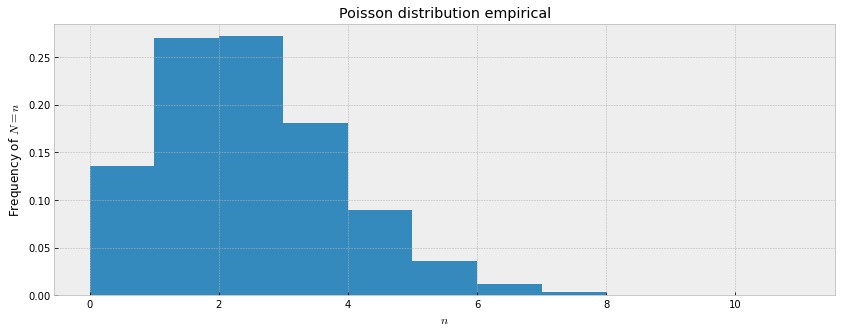

In [5]:
### Drawing a histogram (empirical distribution)
mean=2
samples_mean2 = np.random.poisson(mean, 100000) # this is the simulation. Mean is lambda and the other number is how many trials
n_bins2 = np.max(samples_mean2) # set the number of bins in the histogram based on the highest value in the outcome
##
plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2, density=True)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution empirical')
plt.show() 

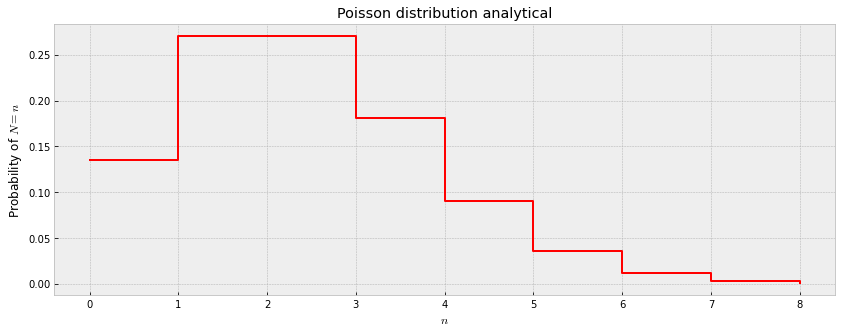

In [6]:
#Analytical formula for Poisson
x = np.arange(0, ss.poisson.ppf(0.9999, mean)) # set the range from 0 to the 99.99% of probability of outcome
analytical = ss.poisson.pmf(x, mean) # creating a array with the values; check documentation and examples
plt.figure(figsize=(14,5))
plt.step(analytical,'r', where='post') # plotting as a step function which gets the previous value
plt.xlabel('$n$')
plt.ylabel('Probability of $N = n$')
plt.title('Poisson distribution analytical')
plt.show() 

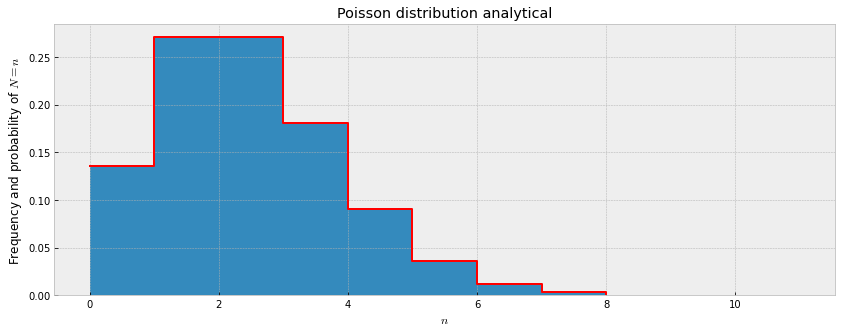

In [7]:
plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2, density=True)
plt.step(analytical,'r', where='post')
plt.xlabel('$n$')
plt.ylabel('Frequency and probability of $N = n$')
plt.title('Poisson distribution analytical')
plt.show() 

Validation many times requires statistical tests.

#### Try yourself:
- set different number of trials: smaller (100) and greater (1000000)
- test different mean values: 1 and 20
- run the experiments and check what happens

## Example of simple queue

- Packets or persons arrive following a Poisson distribution with mean $\lambda$ in a given period of time
- Packets or persons that have arrived service rate follows a Poisson distribution with mean $\mu$
- Probability that queue is empty: $1-\rho = 1 - \lambda/\mu$

### Experiment from last week

In [8]:
#time periods
size=100000
#Arrival
arrival_rate = 10
arrival = np.random.poisson(arrival_rate, size)
#Service
service_rate = 15
service = np.random.poisson(service_rate, size)
#
queue_size = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue_size[i]) > 0:
        queue_size[i+1] = max(0,(arrival[i] - service[i]) + queue_size[i])

print('Idle ratio:',(size - np.count_nonzero(queue_size))/size)
print('Empty queue probability:', 1 -  arrival_rate/service_rate)

Idle ratio: 0.82922
Empty queue probability: 0.33333333333333337


### Why is it wrong?

In [9]:
#time periods
size=20000
#Arrival
arrival_rate = 10
arrival = np.random.poisson(arrival_rate, size)
#Service
service_rate = 13
service = np.random.poisson(service_rate, size)
#
queue_size = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue_size[i]) > 0:
        queue_size[i+1] = max(0,(arrival[i] - service[i]) + queue_size[i])

print('Idle ratio:',(size - np.count_nonzero(queue_size))/size)
print('Empty queue probability:', 1 -  arrival_rate/service_rate)

Idle ratio: 0.65415
Empty queue probability: 0.23076923076923073


In [10]:
arrival

array([ 6, 10, 11, ...,  6, 11,  5])

In [11]:
service

array([10,  9, 13, ..., 11, 14, 12])

In [12]:
queue_size

array([0., 0., 1., ..., 0., 0., 0.])

## Packing too many things together

## Not capturing the actual dynamics...but how to solve it?

## Simulation based on events!

In [13]:
#Code adapted from: https://github.com/sarthak0120/M-M-1-Queue-Simulation
#New libraries needed
import queue #https://docs.python.org/3/library/queue.html
import copy 

- [queue](https://docs.python.org/3/library/queue.html)

### Steps (in simple)

1. Define time-granularity of "checks": 1 second
2. Arrival process: Sequencial of exponential random variables until reach the total observation time
3. Generate a service time for each process arrived as another exponential random variable
4. Run the queue for every "second"

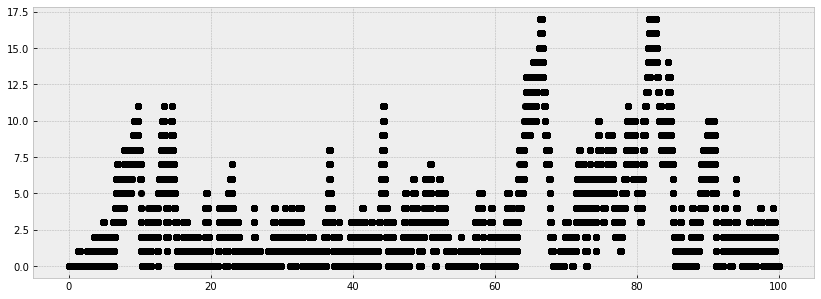

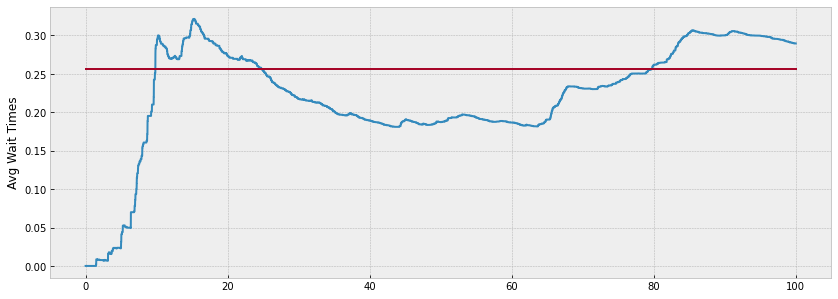

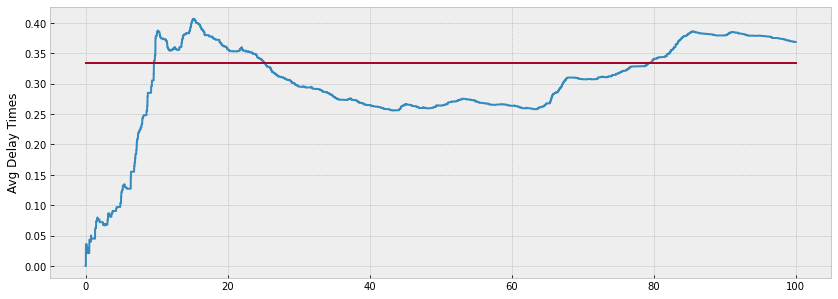

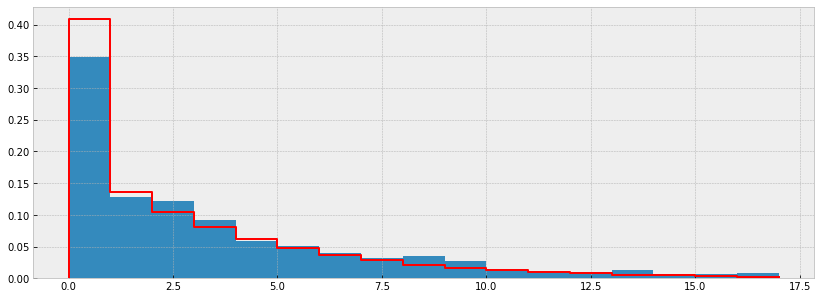

Idle ratio: 0.19091111111111111
Empty queue probability: 0.23076923076923073
Wait time in queue 0.25641025641025644
Delay time in system 0.33333333333333337


In [15]:
# Input Parameters -- Long one
total_time = 100 #hours
IAT_rate = 10 #elements arriving/hour
ST_rate = 13  #elements served/hour
rho = IAT_rate/ST_rate


# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
num_processes_served=0

IAT.append(0)
i=1
while np.sum(IAT) < total_time*60*60 :
    i = i + 1
    temp = np.random.exponential(1/IAT_rate)*60*60
    IAT.append(int(temp - temp%1))
num_processes = i
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation of M/M/1 Queue (i represents current time)
queue_size = np.zeros(total_time*60*60)
empty_system=0

for i in range(total_time*60*60):
    queue_size[i] = qu.qsize()
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
    #after some transitory
    if not server_busy and qu.empty():
        empty_system = empty_system+1


    sum_wait = 0
    sum_delay = 0
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

###Analytical
QWT = 1/((1-rho)*ST_rate) - 1/ST_rate
WT = 1/((1-rho)*ST_rate) 

  
time_hours = np.linspace(0,total_time,total_time*60*60)
    
plt.figure(figsize=(14,5))
#plt.plot( arrival, 'o',label='Arrival')
#plt.plot( service, 'x',label='Sevice')
plt.plot(time_hours,queue_size, 'ok')

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_wait)
plt.plot([0, total_time], [QWT, QWT])
plt.ylabel("Avg Wait Times")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_delay)
plt.plot([0, total_time], [WT, WT])
plt.ylabel("Avg Delay Times")
plt.show()

plt.figure(figsize=(14,5))
n_bins = np.max(queue_size)
##
plt.hist(queue_size,n_bins.astype(int),density=True)
x = np.arange(0, n_bins+1)
p_analytical = (1-rho)*rho**x
p_analytical[1]= p_analytical[0] + p_analytical[1]
p_analytical[0]= 0
plt.step(p_analytical,'r')
plt.show()

print('Idle ratio:',empty_system/(total_time*60*60))
print('Empty queue probability:', 1 -  rho)
print('Wait time in queue',QWT)
print('Delay time in system',WT)